### 0. 데이터 전처리 및 정리

In [2]:
import numpy as np
import pandas as pd

In [4]:
win_team = pd.read_csv('ranked_win_team_game_edit.csv')
lose_team = pd.read_csv('ranked_lose_team_game_edit.csv')

win_player = pd.read_csv('win_player_ranked_sum.csv')
lose_player = pd.read_csv('lose_player_ranked_sum.csv')

# 게임아이디, 게임소요시간을 키로 inner join 팀데이터, 플레이어 데이터
merged_df1 = pd.merge(win_team, win_player, on=['gameId','gameDuration'], how='inner')
merded_df2 = pd.merge(lose_team, lose_player, on = ['gameId','gameDuration'], how='inner')

# 승리팀, 패배팀 데이터 결합
df = pd.concat([merged_df1,merded_df2], ignore_index=True)

# 필요없는 컬럼 제거
df = df.drop(['queueId', 'P1_teamId','gameVersion'], axis = 'columns')

# True, False 로 되어있는 데이터, bool 타입으로 일괄 변경
n = df.shape[1]
for i in range(n):
    if str(df.iloc[0,i]) =='True' or str(df.iloc[0,i]) == 'False':
        df[df.columns[i]] = df[df.columns[i]].astype(bool)

# 범주형 데이터를 이진형 데이터로 변환
df = df.replace({True:1, False:0})
df = df.replace({'Win':1, 'Fail':0})
df = df.replace({'100':1, '200':0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154172 entries, 0 to 154171
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   gameId                                      154172 non-null  float64
 1   gameDuration                                154172 non-null  float64
 2   teamId                                      154172 non-null  int64  
 3   win                                         154172 non-null  int64  
 4   firstBlood                                  154172 non-null  int64  
 5   firstTower                                  154172 non-null  int64  
 6   firstInhibitor                              154172 non-null  int64  
 7   firstBaron                                  154172 non-null  int64  
 8   firstDragon                                 154172 non-null  int64  
 9   firstRiftHerald                             154172 non-null  int64  
 

In [11]:
df.head()

,gameId,gameDuration,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,...,P_stats_physicalDamageTaken_sum,P_stats_trueDamageTaken_sum,P_stats_totalDamageTaken_sum,P_stats_totalHeal_sum,P_stats_damageSelfMitigated_sum,P_stats_timeCCingOthers_sum,P_stats_wardsPlaced_sum,P_stats_wardsKilled_sum,P_stats_goldEarned_sum,P_stats_goldSpent_sum
0,4.247263e+09,1323.0,200,1,0,1,1,0,1,1,...,53345.0,2481.0,83723.0,38711.0,43665.0,93.0,50.0,17.0,49832.0,41935.0
1,4.247156e+09,1317.0,100,1,0,0,0,0,1,1,...,49033.0,1358.0,63456.0,26397.0,42434.0,74.0,57.0,18.0,41072.0,34960.0
2,4.243963e+09,932.0,200,1,1,1,1,0,1,1,...,27051.0,638.0,40416.0,12589.0,28055.0,67.0,40.0,9.0,35364.0,30755.0
3,4.241678e+09,2098.0,200,1,1,1,0,0,0,1,...,80742.0,10851.0,144672.0,65312.0,129493.0,163.0,96.0,56.0,70528.0,63893.0
4,4.241539e+09,2344.0,100,1,1,1,1,1,1,1,...,64462.0,14975.0,162481.0,37161.0,117374.0,119.0,114.0,35.0,74955.0,71580.0


In [5]:
#데이터 null 확인
df.isnull().sum().sum()

0

In [6]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['gameId', 'gameDuration', 'teamId', 'win', 'firstBlood', 'firstTower',
       'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald',
       'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills',
       'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore',
       'ban_champion_1', 'ban_champion_2', 'ban_champion_3', 'ban_champion_4',
       'ban_champion_5', 'P_stats_kills_sum', 'P_stats_deaths_sum',
       'P_stats_assists_sum', 'P_stats_magicDamageDealtToChampions_sum',
       'P_stats_physicalDamageDealtToChampions_sum',
       'P_stats_trueDamageDealtToChampions_sum',
       'P_stats_totalDamageDealtToChampions_sum',
       'P_stats_magicalDamageTaken_sum', 'P_stats_physicalDamageTaken_sum',
       'P_stats_trueDamageTaken_sum', 'P_stats_totalDamageTaken_sum',
       'P_stats_totalHeal_sum', 'P_stats_damageSelfMitigated_sum',
       'P_stats_timeCCingOthers_sum', 'P_stats_wardsPlaced_sum',
       'P_stats_wardsKilled

### 1. 승리팀 평균치, 패배팀 평균치 비교

In [8]:
df.describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,154172.000000,154172.000000,154172.000000,154172.000000
mean,4.493546,0.599344,0.355525,1.599006
std,3.430479,0.869789,0.570551,1.251596
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000
50%,4.000000,0.000000,0.000000,2.000000
75%,7.000000,1.000000,1.000000,2.000000
max,11.000000,10.000000,5.000000,7.000000


In [13]:
# 패배팀 데이터 통계
df[df['win'] == 0].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,77086.000000,77086.000000,77086.000000,77086.000000
mean,1.879148,0.079340,0.123563,0.937044
std,1.963513,0.368275,0.374896,1.025873
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,2.000000
max,11.000000,6.000000,4.000000,6.000000


In [15]:
# 승리팀 데이터 통계
df[df['win'] == 1].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,77086.000000,77086.000000,77086.000000,77086.000000
mean,7.107944,1.119347,0.587487,2.260968
std,2.451694,0.914678,0.634743,1.097357
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,1.000000
50%,7.000000,1.000000,1.000000,2.000000
75%,9.000000,2.000000,1.000000,3.000000
max,11.000000,10.000000,5.000000,7.000000


In [16]:
df[df['towerKills'] == 0].describe()[['inhibitorKills','baronKills','dragonKills']]

,inhibitorKills,baronKills,dragonKills
count,24715.0,24715.000000,24715.000000
mean,0.0,0.010884,0.382642
std,0.0,0.105308,0.616738
min,0.0,0.000000,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.000000,0.000000
75%,0.0,0.000000,1.000000
max,0.0,2.000000,4.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

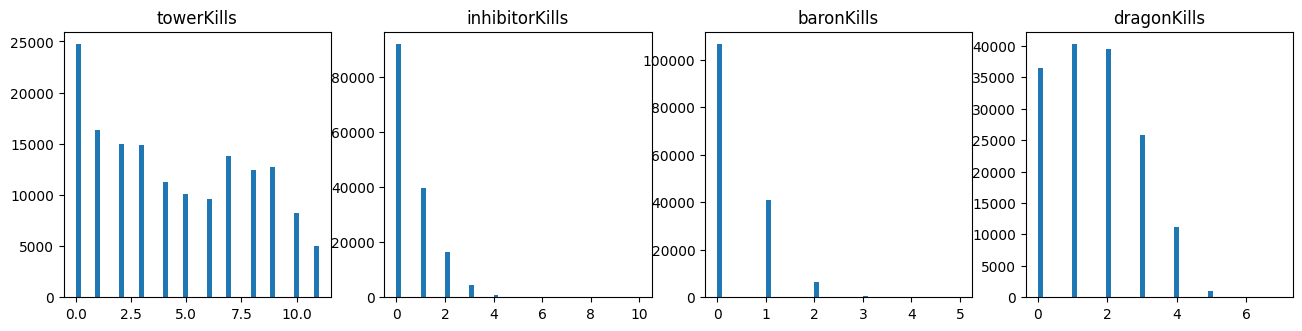

In [18]:
df_hist = df[['towerKills','inhibitorKills','baronKills','dragonKills']]

def plot_hist_each_column(df_hist):
    plt.rcParams['figure.figsize'] = [20,20]
    fig = plt.figure()
    for i in range(len(df_hist.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df_hist[df_hist.columns[i]], bins=50)
        ax.set_title(df_hist.columns[i])
    plt.show()

plot_hist_each_column(df_hist)

### 2. 승리팀 중요 변수 확인

In [19]:
# 숫자형 데이터 제거, 퍼스트 데이터만 요인 분석
df_first = df.drop(["towerKills","inhibitorKills","baronKills",
         "dragonKills","vilemawKills","riftHeraldKills",
         "dominionVictoryScore","gameId","teamId", "ban_champion_1", "ban_champion_2", 
         "ban_champion_3", "ban_champion_4", "ban_champion_5"], axis=1)

df_first.head()

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,P_stats_kills_sum,P_stats_deaths_sum,...,P_stats_physicalDamageTaken_sum,P_stats_trueDamageTaken_sum,P_stats_totalDamageTaken_sum,P_stats_totalHeal_sum,P_stats_damageSelfMitigated_sum,P_stats_timeCCingOthers_sum,P_stats_wardsPlaced_sum,P_stats_wardsKilled_sum,P_stats_goldEarned_sum,P_stats_goldSpent_sum
0,1323.0,1,0,1,1,0,1,1,31.0,15.0,...,53345.0,2481.0,83723.0,38711.0,43665.0,93.0,50.0,17.0,49832.0,41935.0
1,1317.0,1,0,0,0,0,1,1,19.0,8.0,...,49033.0,1358.0,63456.0,26397.0,42434.0,74.0,57.0,18.0,41072.0,34960.0
2,932.0,1,1,1,1,0,1,1,20.0,5.0,...,27051.0,638.0,40416.0,12589.0,28055.0,67.0,40.0,9.0,35364.0,30755.0
3,2098.0,1,1,1,0,0,0,1,36.0,26.0,...,80742.0,10851.0,144672.0,65312.0,129493.0,163.0,96.0,56.0,70528.0,63893.0
4,2344.0,1,1,1,1,1,1,1,27.0,40.0,...,64462.0,14975.0,162481.0,37161.0,117374.0,119.0,114.0,35.0,74955.0,71580.0


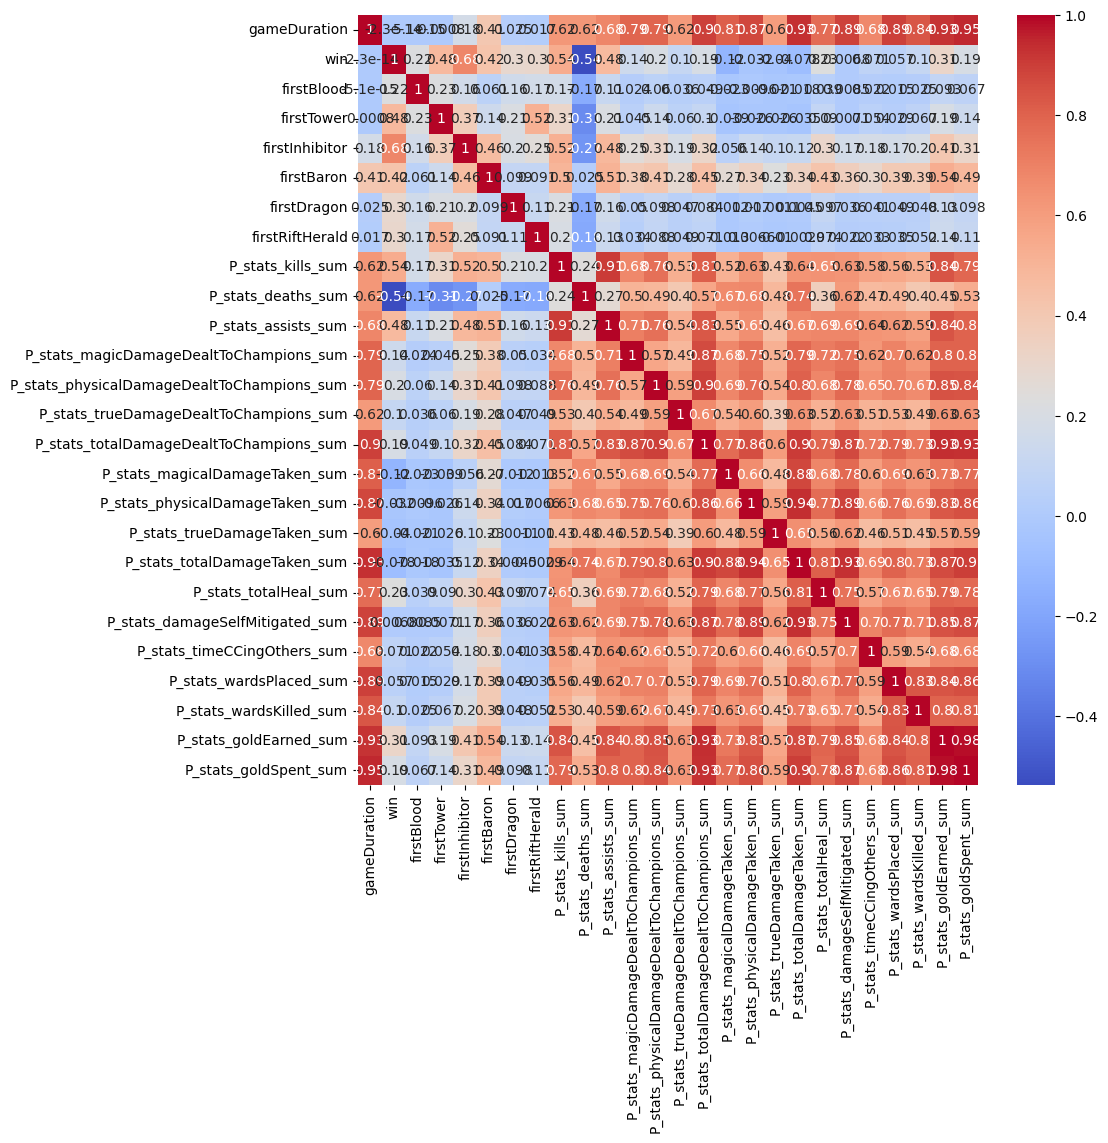

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#항목별 상관도 확인
plt.figure(figsize=(10,10))
sns.heatmap(df_first.corr(),cmap='coolwarm',annot=True)
plt.show()

In [22]:
df_first["firstBlood"] = df["firstBlood"].astype(int)
df_first["firstTower"] = df["firstTower"].astype(int)
df_first["firstInhibitor"] = df["firstInhibitor"].astype(int)
df_first["firstDragon"] = df["firstDragon"].astype(int)
df_first["firstBaron"] = df["firstBaron"].astype(int)
df_first["firstRiftHerald"] = df["firstRiftHerald"].astype(int)

In [22]:
df_first.groupby('win').mean()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,P_stats_kills_sum,P_stats_deaths_sum,P_stats_assists_sum,...,P_stats_physicalDamageTaken_sum,P_stats_trueDamageTaken_sum,P_stats_totalDamageTaken_sum,P_stats_totalHeal_sum,P_stats_damageSelfMitigated_sum,P_stats_timeCCingOthers_sum,P_stats_wardsPlaced_sum,P_stats_wardsKilled_sum,P_stats_goldEarned_sum,P_stats_goldSpent_sum
win,,,,,,,,,,,,,,,,,,,,,
0,1480.825117,0.390006,0.259048,0.045689,0.091210,0.344680,0.332603,16.312391,27.821303,24.824962,...,54060.030706,4359.927756,89021.527852,21056.935669,63400.020419,84.017824,58.962808,21.158952,41984.059738,40070.400384
1,1480.825117,0.609994,0.740355,0.707599,0.472433,0.641738,0.630906,27.765236,16.396855,44.148276,...,52653.590393,4087.724451,83199.434113,27727.965026,63912.889682,90.223971,61.940819,23.932154,51057.671056,45485.186000


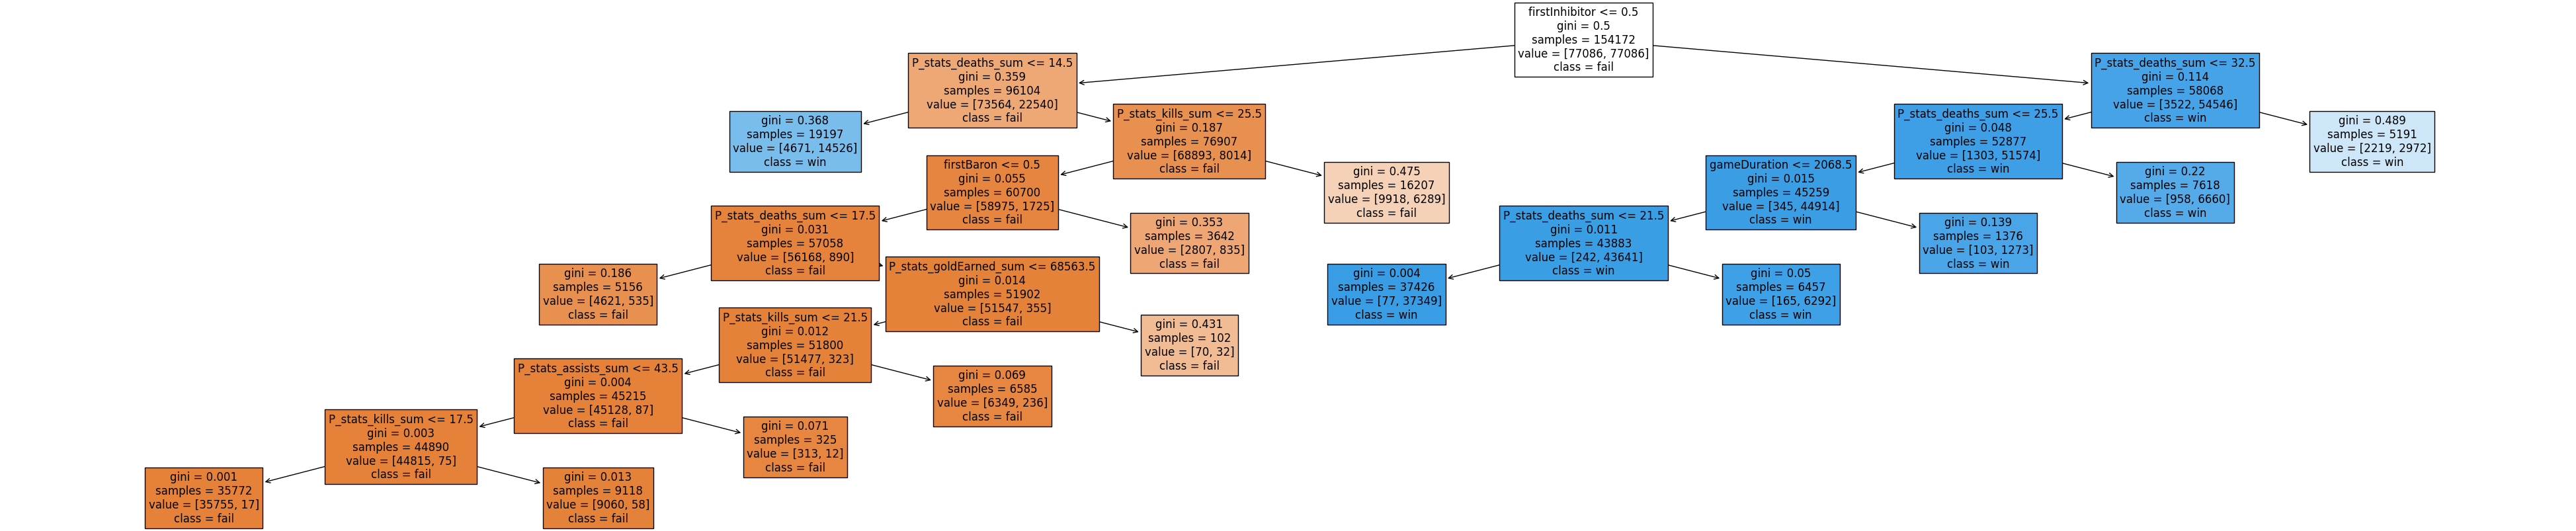

In [23]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X = df_first.drop(['win'], axis=1)
y = df_first['win']
xname = X.columns
yname = ['fail','win']

c_tree = DecisionTreeClassifier(min_samples_split=40000,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(50,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()


### 3. 경기 시간 segment 별 EDA

### 4. 앙상블 분석 : 승리 예측 정확도 비교

     4.1 랜덤포레스트

In [24]:
from sklearn.model_selection import train_test_split

X = df[['firstBlood', 'firstTower',
       'firstBaron', 'firstDragon', 'firstInhibitor', 'dragonKills',
       'baronKills', 'towerKills', 'inhibitorKills']]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=123456)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

#oob_score = out of bag score로써 예측이 얼마나 정확한가에 대한 추정치입니다.
print(f'랜덤포레스트 테스트 정확도=  : {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')


랜덤포레스트 테스트 정확도=  : 0.884
Mean accuracy score: 0.883


    4.2 GradientBoosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train,y_train)

y_pred = clf_gbc.predict(X_test)

print('GradientBoosting 테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))

GradientBoosting 테스트 정확도 = 0.8830656669174688


    4.3 Xgboost

In [28]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot

In [29]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

print('Xgboost 테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))#정확도 계산

Xgboost 테스트 정확도 = 0.885997457385258


    4.4 변수 중요도 체크

In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 1000x500 with 0 Axes>

 1)firstBlood                    0.386597
 2)firstTower                    0.198951
 3)firstBaron                    0.160988
 4)firstDragon                   0.092747
 5)firstInhibitor                0.082058
 6)dragonKills                   0.029657
 7)baronKills                    0.019687
 8)towerKills                    0.018123
 9)inhibitorKills                0.011190


Text(0.5, 1.0, '랜덤포레스트 Feature Importances')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x206bad252a0>,
 [Text(0, 0, 'firstBlood'),
  Text(1, 0, 'firstTower'),
  Text(2, 0, 'firstBaron'),
  Text(3, 0, 'firstDragon'),
  Text(4, 0, 'firstInhibitor'),
  Text(5, 0, 'dragonKills'),
  Text(6, 0, 'baronKills'),
  Text(7, 0, 'towerKills'),
  Text(8, 0, 'inhibitorKills')])

(-1.0, 9.0)

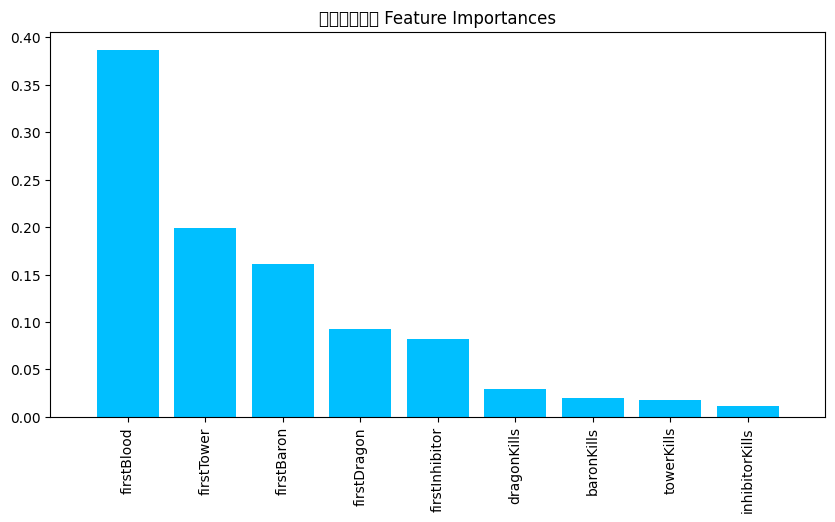

In [31]:
# 랜덤포레스트 변수 중요도
plt.figure(figsize=(10,5))

features_label = X.columns
rf_importances = rf.feature_importances_
indices = np.argsort(rf_importances)[::-1]
for i in range(X.shape[1]):
     print('%2d)%-*s%f'%(i+1, 30, features_label[i], rf_importances[indices[i]]))
plt.title('랜덤포레스트 Feature Importances')
plt.bar(range(X.shape[1]), rf_importances[indices], color='deepskyblue', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Gradient Boosting Feature importances')

<Axes: title={'center': 'Gradient Boosting Feature importances'}>

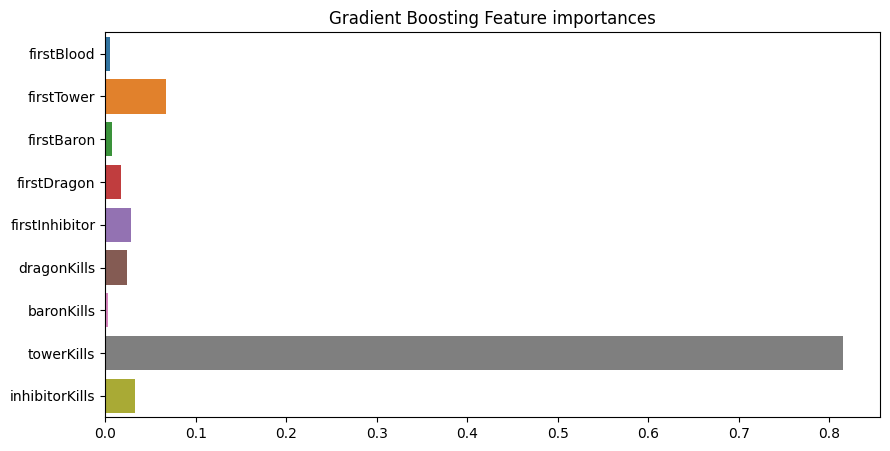

In [32]:
# Gradient Boosting 변수 중요도
plt.figure(figsize=(10,5))

gb_importances = clf_gbc.feature_importances_
gb_importances = pd.Series(gb_importances, index = X_train.columns)

plt.title('Gradient Boosting Feature importances')
sns.barplot(x=gb_importances, y=X_train.columns)
plt.show()

<AxesSubplot: title={'center': 'xgboost Feature importances'}, xlabel='F score', ylabel='Features'>

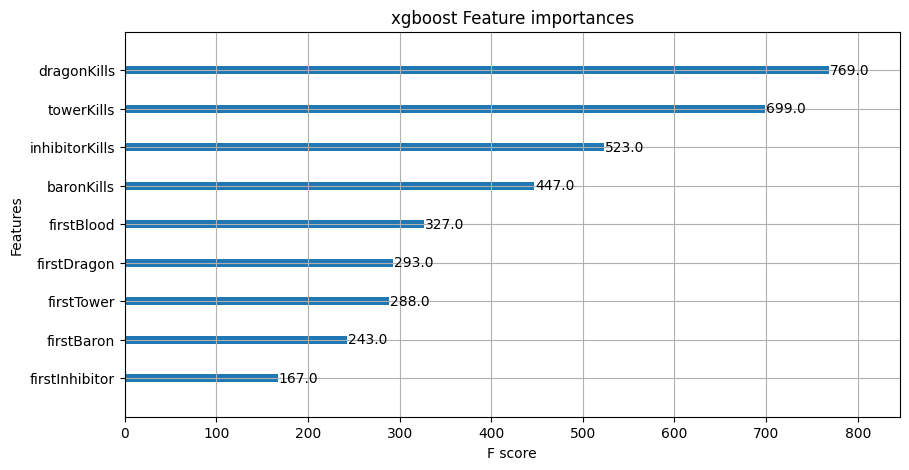

In [35]:
# xgboost 변수 중요도

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_model, title='xgboost Feature importances', ax=ax)

### 5. 로지스틱 회귀분석

In [33]:
df = df.drop(['gameId', 'gameDuration', 'vilemawKills', 'dominionVictoryScore','ban_champion_1', 'ban_champion_2', 'ban_champion_3', 'ban_champion_4', 'ban_champion_5'], axis=1)
df.corr()[['win']]

,win
teamId,0.006460
win,1.000000
firstBlood,0.219988
firstTower,0.481307
firstInhibitor,0.683023
firstBaron,0.423688
firstDragon,0.297085
firstRiftHerald,0.298502
towerKills,0.762111
inhibitorKills,0.597852


In [34]:
df

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,...,P_stats_physicalDamageTaken_sum,P_stats_trueDamageTaken_sum,P_stats_totalDamageTaken_sum,P_stats_totalHeal_sum,P_stats_damageSelfMitigated_sum,P_stats_timeCCingOthers_sum,P_stats_wardsPlaced_sum,P_stats_wardsKilled_sum,P_stats_goldEarned_sum,P_stats_goldSpent_sum
0,200,1,0,1,1,0,1,1,9,1,...,53345.0,2481.0,83723.0,38711.0,43665.0,93.0,50.0,17.0,49832.0,41935.0
1,100,1,0,0,0,0,1,1,4,0,...,49033.0,1358.0,63456.0,26397.0,42434.0,74.0,57.0,18.0,41072.0,34960.0
2,200,1,1,1,1,0,1,1,5,1,...,27051.0,638.0,40416.0,12589.0,28055.0,67.0,40.0,9.0,35364.0,30755.0
3,200,1,1,1,0,0,0,1,6,0,...,80742.0,10851.0,144672.0,65312.0,129493.0,163.0,96.0,56.0,70528.0,63893.0
4,100,1,1,1,1,1,1,1,11,3,...,64462.0,14975.0,162481.0,37161.0,117374.0,119.0,114.0,35.0,74955.0,71580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154167,100,0,0,0,0,0,0,0,0,0,...,33286.0,836.0,40408.0,6961.0,23271.0,31.0,31.0,8.0,23269.0,23104.0
154168,200,0,0,1,0,0,1,0,1,0,...,57260.0,2976.0,96933.0,31291.0,58919.0,92.0,47.0,19.0,36579.0,35740.0
154169,200,0,0,0,0,0,0,0,0,0,...,18397.0,1005.0,36488.0,5316.0,18004.0,42.0,24.0,3.0,20917.0,18120.0
154170,200,0,0,1,0,0,1,1,3,0,...,52157.0,1668.0,80161.0,22970.0,58307.0,57.0,64.0,22.0,42639.0,40008.0


In [39]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X = df[df.columns.difference(['win'])]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    win   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          4.166e+04
Date:                Tue, 21 Feb 2023   Prob (F-statistic):                        0.00
Time:                        13:42:42   Log-Likelihood:                          18841.
No. Observations:              115629   AIC:                                 -3.762e+04
Df Residuals:                  115599   BIC:                                 -3.733e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
P_stats_assists_sum                            0.0018   8.39e-05     20.969      0.000       0.002       0.002
P_stats_damageSelfMitigated_sum            -7.143e-07   5.02e-08    -14.233      0.000   -8.13e-07   -6.16e-07
P_stats_deaths_sum                            -0.0149      0.000   -102.987      0.000      -0.015      -0.015
P_stats_goldEarned_sum                      4.152e-05   3.09e-07    134.329      0.000    4.09e-05    4.21e-05
P_stats_goldSpent_sum                      -2.895e-05   2.84e-07   -101.817      0.000   -2.95e-05   -2.84e-05
P_stats_kills_sum                              0.0132      0.000     73.598      0.000       0.013       0.014
P_stats_magicDamageDealtToChampions_sum       -0.0062      0.000    -13.816      0.000      -0.007      -0.005
P_stats_magicalDamageTaken_sum                -0.0093      0.000    -23.113      0.000      -0.010      -0.009
P_stats_physicalDamageDealtToChampions_sum    -0.0062      0.000    -13.817      0.000      -0.007      -0.005
P_stats_physicalDamageTaken_sum               -0.0093      0.000    -23.110      0.000      -0.010      -0.009
P_stats_timeCCingOthers_sum                -1.403e-05   2.08e-05     -0.673      0.501   -5.49e-05    2.68e-05
P_stats_totalDamageDealtToChampions_sum        0.0062      0.000     13.815      0.000       0.005       0.007
P_stats_totalDamageTaken_sum                   0.0093      0.000     23.100      0.000       0.009       0.010
P_stats_totalHeal_sum                       3.333e-06   9.59e-08     34.756      0.000    3.14e-06    3.52e-06
P_stats_trueDamageDealtToChampions_sum        -0.0062      0.000    -13.817      0.000      -0.007      -0.005
P_stats_trueDamageTaken_sum                   -0.0093      0.000    -23.118      0.000      -0.010      -0.009
P_stats_wardsKilled_sum                       -0.0027   8.83e-05    -30.397      0.000      -0.003      -0.003
P_stats_wardsPlaced_sum                       -0.0011   5.48e-05    -19.374      0.000      -0.001      -0.001
baronKills                                     0.0764      0.003     29.882      0.000       0.071       0.081
dragonKills                                    0.0188      0.001     22.039      0.000       0.017       0.020
firstBaron                                    -0.0467      0.003    -15.766      0.000      -0.053      -0.041
firstBlood                                    -0.0048      0.001     -3.756      0.000      -0.007      -0.002
firstDragon                                    0.0099      0.002      6.382      0.000       0.007       0.013
firstInhibitor                                 0.0661      0.003     26.117      0.000       0.061

Text(0.5, 1.0, 'feature_coef_graph')

Text(0.5, 0, 'X_features')

Text(0, 0.5, 'coef')

[Text(0, 0, 'P_stats_assists_sum'),
 Text(1, 0, 'P_stats_damageSelfMitigated_sum'),
 Text(2, 0, 'P_stats_deaths_sum'),
 Text(3, 0, 'P_stats_goldEarned_sum'),
 Text(4, 0, 'P_stats_goldSpent_sum'),
 Text(5, 0, 'P_stats_kills_sum'),
 Text(6, 0, 'P_stats_magicDamageDealtToChampions_sum'),
 Text(7, 0, 'P_stats_magicalDamageTaken_sum'),
 Text(8, 0, 'P_stats_physicalDamageDealtToChampions_sum'),
 Text(9, 0, 'P_stats_physicalDamageTaken_sum'),
 Text(10, 0, 'P_stats_timeCCingOthers_sum'),
 Text(11, 0, 'P_stats_totalDamageDealtToChampions_sum'),
 Text(12, 0, 'P_stats_totalDamageTaken_sum'),
 Text(13, 0, 'P_stats_totalHeal_sum'),
 Text(14, 0, 'P_stats_trueDamageDealtToChampions_sum'),
 Text(15, 0, 'P_stats_trueDamageTaken_sum'),
 Text(16, 0, 'P_stats_wardsKilled_sum'),
 Text(17, 0, 'P_stats_wardsPlaced_sum'),
 Text(18, 0, 'baronKills'),
 Text(19, 0, 'dragonKills'),
 Text(20, 0, 'firstBaron'),
 Text(21, 0, 'firstBlood'),
 Text(22, 0, 'firstDragon'),
 Text(23, 0, 'firstInhibitor'),
 Text(24, 0, 'fi

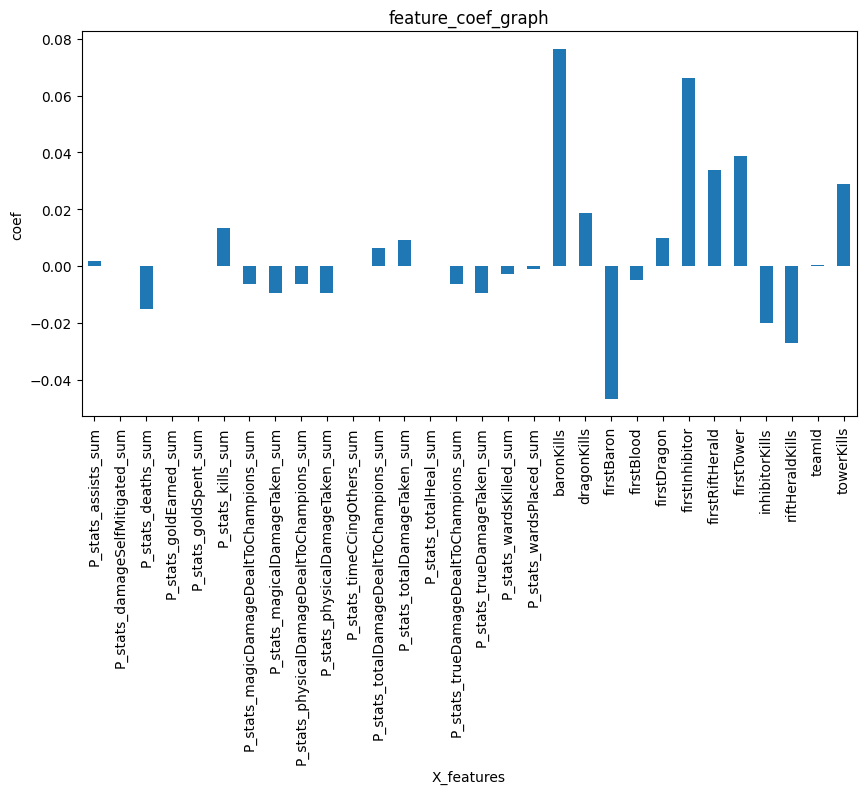

In [40]:
import matplotlib.pyplot as plt

coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

plt.rcParams['figure.figsize'] = [10,5]

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('X_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

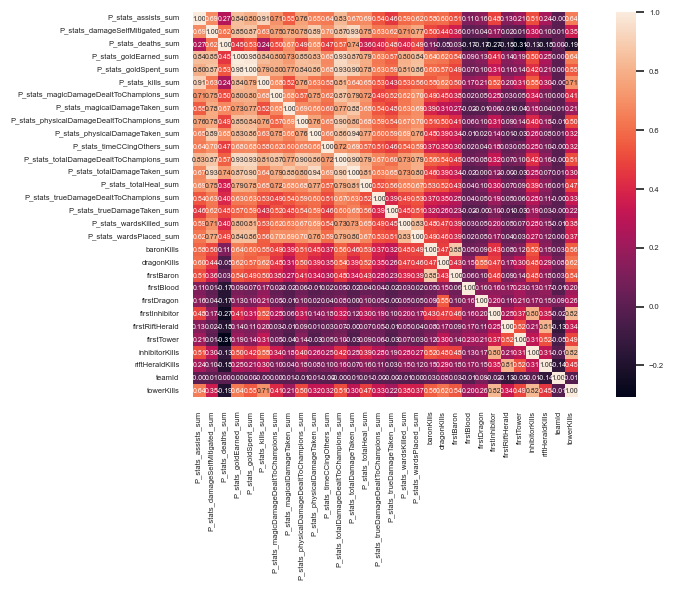

In [41]:
import seaborn as sns

corr = df[X.columns].corr(method='pearson')
sns.set(font_scale=0.5)
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size' : 5}, 
                 yticklabels = X.columns, xticklabels = X.columns )

sns.set(style = 'whitegrid', context = 'notebook')
plt.show()

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(3)


,VIF Factor,features
0,3.083400e+01,P_stats_assists_sum
1,3.800200e+01,P_stats_damageSelfMitigated_sum
2,3.465100e+01,P_stats_deaths_sum
3,6.202500e+02,P_stats_goldEarned_sum
4,4.510280e+02,P_stats_goldSpent_sum
5,5.301800e+01,P_stats_kills_sum
6,5.306707e+08,P_stats_magicDamageDealtToChampions_sum
7,4.859294e+08,P_stats_magicalDamageTaken_sum
8,7.881860e+08,P_stats_physicalDamageDealtToChampions_sum
9,1.483366e+09,P_stats_physicalDamageTaken_sum


In [44]:
print(vif)

      VIF Factor                                    features
0   3.083371e+01                         P_stats_assists_sum
1   3.800164e+01             P_stats_damageSelfMitigated_sum
2   3.465096e+01                          P_stats_deaths_sum
3   6.202498e+02                      P_stats_goldEarned_sum
4   4.510279e+02                       P_stats_goldSpent_sum
5   5.301803e+01                           P_stats_kills_sum
6   5.306707e+08     P_stats_magicDamageDealtToChampions_sum
7   4.859294e+08              P_stats_magicalDamageTaken_sum
8   7.881860e+08  P_stats_physicalDamageDealtToChampions_sum
9   1.483366e+09             P_stats_physicalDamageTaken_sum
10  1.123947e+01                 P_stats_timeCCingOthers_sum
11  2.822547e+09     P_stats_totalDamageDealtToChampions_sum
12  3.927147e+09                P_stats_totalDamageTaken_sum
13  2.039520e+01                       P_stats_totalHeal_sum
14  1.480148e+07      P_stats_trueDamageDealtToChampions_sum
15  1.323433e+07        

In [ ]:
# 두 변수를 제거하고 회귀분석 수행

X2 = df[df.columns.difference(['Wins', 'TowerKills', 'BaronKills'])]
y2 = df['Wins']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=19)
model = sm.OLS(y_train2, X_train2).fit()
model.summary()

In [ ]:
for i in range(len(model.params)):
    print('다른 변수가 고정되어 있으며, {} 이 한단위 상승할 때 승리할 확률이 {} 배 증가한다.\n'.format(model.params.keys()[i],np.exp(model.params.values[i])))